# Projcet2 - Predicting Medical Appointment No Shows

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

I choose the 'Medical Appointment No Shows' dataset in Kaggle. This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row. There are 14 features in this dataset. The explanation for each feature is as follows. 
- PatientId: Identification of a patient 
- AppointmentID: Identification of each appointment 
- Gender: Male or Female; Female is the greater proportion, woman takes way more care of they health in comparison to man. 
- ScheduledDay: The day someone called or registered the appointment, this is before appointment of course.
- AppointmentDay: The day of the actuall appointment, when they have to visit the doctor. 
- Age: How old is the patient. 
- Neighbourhood: Where the appointment takes place. 
- Scholarship: Ture of False. (This is a broad topic, consider reading this article https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia)
- Hipertension: True or False 
- Diabetes: True or False 
- Alcoholism: = True or False 
- Handcap: True or False 
- SMS_received: 1 or more messages sent to the patient. 
- No-show: True or False. (‘No’if the patient showed up to their appointment, and ‘Yes’ if they didn't show up.)

The purpose of this analysis is that what factors are important for us to know in order to predict if a patient will show up for their scheduled appointment. 

Independent variables for analysis.
1. Gender
2. Period between the scheduled day and appointment day.
3. Age
4. Scholarship
5. Disease (hipertension, diabetes, alcoholism) - each element is counted as 1, sum of all
6. SMS-received

Dependent variable is the 'No-show'

The proper question is **"what factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?".**

First, import pandas, numpy and matplotlib,pyplot. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> In this section of the report, I will load in the data, check for cleanliness, and then trim and clean my dataset for analysis.

### Load a dataset

In [2]:
df = pd.read_csv("noshowappointments-kagglev2-may-2016.csv")
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Check the type of each element and the number of elements

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


There isn't null value in this dataset.

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Remove duplicated elements
Check if there are any duplicated elements.

In [4]:
df.duplicated().sum()

0

There is no duplicated raw so that we don't need to remove duplicated raw
### Fix the typo
Let's fix 'handcap' to 'handicap'

In [5]:
df.rename(columns={"Handcap": "Handicap"}, inplace=True)

### Change the data type
Change the current date-time type to only date type in order to extract only the date part of timestamps without timezone information

In [6]:
df.AppointmentDay = pd.to_datetime(df.AppointmentDay).dt.date
df.ScheduledDay = pd.to_datetime(df.ScheduledDay).dt.date

Subtract the appointment day to scheduled day, then add the difference of the two values into dataframe in order to anaylze that the difference affects No-show rates

In [7]:
df['PeriodBetween'] = df.AppointmentDay - df.ScheduledDay

# convert derived datetime to int
df['PeriodBetween'] = df['PeriodBetween'].dt.days
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,PeriodBetween
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0
1,5.589980e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0
2,4.262960e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,0
3,8.679510e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0
4,8.841190e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0


Change 'No-show' column name to 'Show'. Also, change 'No' value to 1, 'yes' value to 0. (1 if the patient showed up to their appointment, and 0 if they didn't show up.)

In [8]:
df.rename(columns={"No-show": "Show"}, inplace=True)
df.replace({'Show': {'No': 1, 'Yes': 0}}, inplace = True)
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received,Show,PeriodBetween
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,1,0
1,5.589980e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,1,0
2,4.262960e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,1,0
3,8.679510e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1,0
4,8.841190e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,1,0


### Modify nonsense values
Check the detail of 'PeriodBetween' column. It has minimum value of -6, which means applintmemnt day is ahead of scheduled day. It is nonsense, so the negative 'PeriodBetween' value can be replaced by 0. 

In [9]:
df.PeriodBetween.describe()

count    110527.000000
mean         10.183702
std          15.254996
min          -6.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         179.000000
Name: PeriodBetween, dtype: float64

In [10]:
df[df['PeriodBetween'] < 0] = 0
df.PeriodBetween.describe()

count    110527.000000
mean         10.183792
std          15.254924
min           0.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         179.000000
Name: PeriodBetween, dtype: float64

Check if 'Age' column has any nonsense values. It has -1 value, which means age is -1. It can be replace by 0

In [11]:
df.Age.describe()

count    110527.000000
mean         37.087363
std          23.110888
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

In [12]:
df.replace({'Age': {-1: 0}}, inplace = True)
df.Age.describe()

count    110527.000000
mean         37.087372
std          23.110873
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

In 'Gender' column, 'F' means female and 'M' means male. But there is 0 value so we can remove it.

In [13]:
df.groupby('Gender').mean()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received,Show,PeriodBetween
Gender,,,,,,,,,,,
0,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
F,1.460053e+14,5.674337e+06,38.893927,0.123237,0.213525,0.078038,0.017025,0.019530,0.336902,0.796887,10.502248
M,1.502570e+14,5.677103e+06,33.737443,0.051906,0.167041,0.060411,0.055241,0.027246,0.291586,0.800362,9.593744


In [14]:
null_containing_rows_index = df[df.Gender == 0].index
df.drop(index = null_containing_rows_index, inplace = True)
df.Gender.describe()

count     110522
unique         2
top            F
freq       71837
Name: Gender, dtype: object

### Segment PeriodBetween values into bins
The maximum value of the 'PeriodBetween' is 179 and minimum is 0. Variation of the 'PeriodBetween' values are so huge that we have to segment the values into bins like below

In [15]:
bins = pd.IntervalIndex.from_tuples([(-1, 1), (1, 5), (5, 10), (10, 200)])
labels=["rightNow", "fewDaysAgo", "severalDaysAgo", "longAgo"]
df['PeriodBetween'] = pd.cut(df['PeriodBetween'], bins=bins, labels=labels)

In [16]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received,Show,PeriodBetween
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,1,"(-1, 1]"
1,5.589980e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,1,"(-1, 1]"
2,4.262960e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,1,"(-1, 1]"
3,8.679510e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1,"(-1, 1]"
4,8.841190e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,1,"(-1, 1]"


### Segment Age values into bins

In [17]:
df.Age.describe()

count    110522.00000
mean         37.08905
std          23.11005
min           0.00000
25%          18.00000
50%          37.00000
75%          55.00000
max         115.00000
Name: Age, dtype: float64

In [18]:
bins = pd.IntervalIndex.from_tuples([(0, 18), (18, 37), (37, 55), (55, 115)])

df['Age'] = pd.cut(df['Age'], bins)

In [19]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received,Show,PeriodBetween
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,"(55, 115]",JARDIM DA PENHA,0,1,0,0,0,0,1,"(-1, 1]"
1,5.589980e+14,5642503,M,2016-04-29,2016-04-29,"(55, 115]",JARDIM DA PENHA,0,0,0,0,0,0,1,"(-1, 1]"
2,4.262960e+12,5642549,F,2016-04-29,2016-04-29,"(55, 115]",MATA DA PRAIA,0,0,0,0,0,0,1,"(-1, 1]"
3,8.679510e+11,5642828,F,2016-04-29,2016-04-29,"(0, 18]",PONTAL DE CAMBURI,0,0,0,0,0,0,1,"(-1, 1]"
4,8.841190e+12,5642494,F,2016-04-29,2016-04-29,"(55, 115]",JARDIM DA PENHA,0,1,1,0,0,0,1,"(-1, 1]"


### Remove unnecessary columns
We don't need 'Neighbourhood', 'ScheduledDay', 'AppointmentDay' columns for the analsis. We've got the 'PeriodBetween' column from the 'ScheduledDay' and 'ApplintmentDay'. So we only need the 'PeriodBetween' column. 'Neighbourhood' is not necessary for us to get some information.

In [20]:
df.drop(columns=['Neighbourhood', 'ScheduledDay', 'AppointmentDay'], inplace=True)
df.head()

,PatientId,AppointmentID,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received,Show,PeriodBetween
0,2.987250e+13,5642903,F,"(55, 115]",0,1,0,0,0,0,1,"(-1, 1]"
1,5.589980e+14,5642503,M,"(55, 115]",0,0,0,0,0,0,1,"(-1, 1]"
2,4.262960e+12,5642549,F,"(55, 115]",0,0,0,0,0,0,1,"(-1, 1]"
3,8.679510e+11,5642828,F,"(0, 18]",0,0,0,0,0,0,1,"(-1, 1]"
4,8.841190e+12,5642494,F,"(55, 115]",0,1,1,0,0,0,1,"(-1, 1]"


<a id='eda'></a>
## Exploratory Data Analysis


### Question 1 - Does the difference bewtween Appointment day and Scheduled day affect No-show rate?
Groupby 'PeriodBetween' columns to check if it affects the rate of No-show

In [21]:
df_PeriodBetween = df.groupby('PeriodBetween').mean()['Show']
df_PeriodBetween.head()

PeriodBetween
(-1, 1]      0.933639
(1, 5]       0.758778
(5, 10]      0.729521
(10, 200]    0.674853
Name: Show, dtype: float64

Patients scheduled in the day of appointment or the day before appointment are more likely to show up than patients scheduled long ago. To visualize, we can plot the bar chart like below. Also, we can make a function for plotting.

In [22]:
def draw_plot(locations, heights, labels, chartTitle, chartXlabel, chartYlabel):
    plt.bar(locations, heights, tick_label=labels)
    plt.title(chartTitle)
    plt.xlabel(chartXlabel)
    plt.ylabel(chartYlabel);

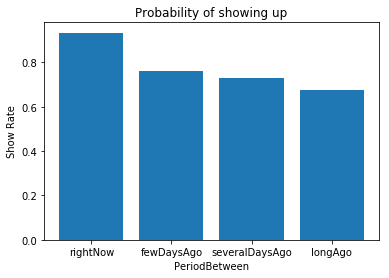

In [23]:
locations = [1, 2, 3, 4]
heights = df_PeriodBetween
labels=["rightNow", "fewDaysAgo", "severalDaysAgo", "longAgo"]
chartTitle = 'Probability of showing up'
chartXlabel = 'PeriodBetween'
chartYlabel = 'Show Rate'

draw_plot(locations, heights, labels, chartTitle, chartXlabel, chartYlabel);

The shorter the 'PeriodBetween', the more likely to show up.

### Question 2 - Does the gender affect No-show rate?
Similar to above, check if there is a different showing rate by gender.

In [24]:
df_gender = df.groupby('Gender').mean()['Show']
df_gender

Gender
F    0.796887
M    0.800362
Name: Show, dtype: float64

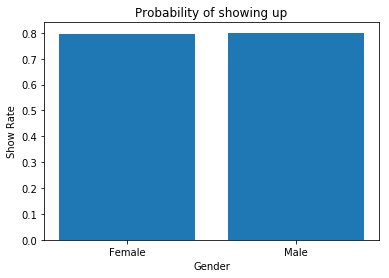

In [25]:
locations = [1, 2]
heights = df_gender
labels = ["Female", "Male"]
chartXlabel = 'Gender'

draw_plot(locations, heights, labels, chartTitle, chartXlabel, chartYlabel);

It has almost the same rate, so we can conclude gender cannot affect the showing rate.

### Question 3 - Does the age affect No-show rate?
Similar to above, check if there is a different showing rate by age.

In [26]:
df_Age = df.groupby('Age').mean()['Show']
df_Age

Age
(0, 18]      0.774658
(18, 37]     0.764680
(37, 55]     0.804720
(55, 115]    0.843581
Name: Show, dtype: float64

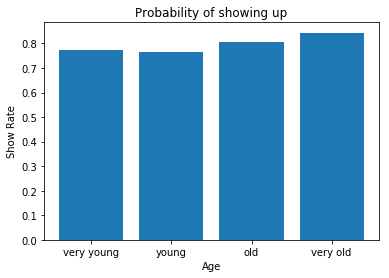

In [27]:
locations = [1, 2, 3, 4]
heights = df_Age
labels = ["very young", "young", "old", "very old"]
chartXlabel = 'Age'

draw_plot(locations, heights, labels, chartTitle, chartXlabel, chartYlabel);

The older the patient are, the more likely to show up.
### Question 4 - Does the scholarship affect No-show rate?

In [28]:
df_scholarship = df.groupby('Scholarship').mean()['Show']
df_scholarship

Scholarship
0    0.801969
1    0.762637
Name: Show, dtype: float64

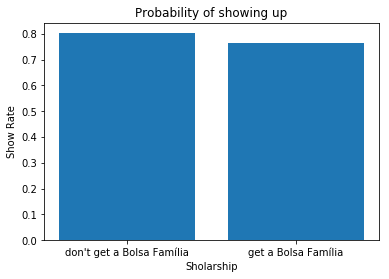

In [29]:
locations = [1, 2]
heights = df_scholarship
labels = ["don't get a Bolsa Família", "get a Bolsa Família"]
chartXlabel = 'Sholarship'

draw_plot(locations, heights, labels, chartTitle, chartXlabel, chartYlabel);

The patients who didn't get a sholarship (also known as Bolsa Familia) are a little more likely to make an appointment.
### Question 5 - Does the disease affect No-show rate?
Let Disease be the sum of Hipertension, Diabetes and Alcoholism.

In [30]:
df['Disease'] = df['Hipertension'] + df['Diabetes'] + df['Alcoholism']

In [31]:
df_disease = df.groupby('Disease').mean()['Show']
df_disease

Disease
0    0.790955
1    0.822034
2    0.822963
3    0.820312
Name: Show, dtype: float64

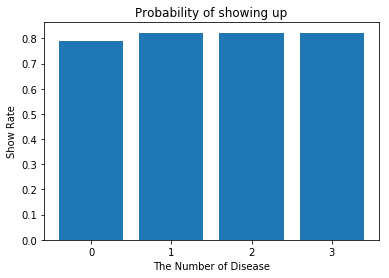

In [32]:
locations = [1, 2, 3, 4]
heights = df_disease
labels = [0, 1, 2, 3]
chartXlabel = 'The Number of Disease'

draw_plot(locations, heights, labels, chartTitle, chartXlabel, chartYlabel);

The more diseases the patients have, the more likely to show up.
### Question 6 - Does the handicap affect No-show rate?
Let's do the same way.

In [33]:
df_handicap = df.groupby('Handicap').mean()['Show']
df_handicap

Handicap
0    0.797669
1    0.821569
2    0.797814
3    0.769231
4    0.666667
Name: Show, dtype: float64

In [34]:
df.groupby('Handicap').mean()['Show']

Handicap
0    0.797669
1    0.821569
2    0.797814
3    0.769231
4    0.666667
Name: Show, dtype: float64

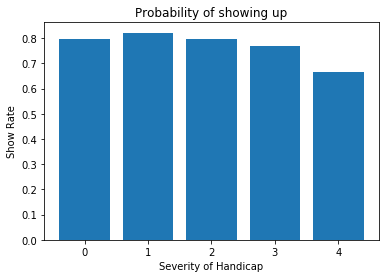

In [35]:
locations = [1, 2, 3, 4, 5]
heights = df_handicap
labels = [0, 1, 2, 3, 4]
chartXlabel = 'Severity of Handicap'

draw_plot(locations, heights, labels, chartTitle, chartXlabel, chartYlabel);

Showing rate of 0 handicap is less than that of 1 handicap. So, we cannot definitely conclude that the higher severity of handicap, the less likely to show up.

<a id='conclusions'></a>
## Conclusions

I've analyzed 6 dependent variables (one for 2D, five for 1D) that affect No-show rate which is a independent variable. The higher or more 'Age', 'Number of disease', the more likely to show up. The less 'PeriodBetween', 'Scholarship', the more likely to show up. I'm not sure 'Gender' and 'Handicap' are the factors that affect the showing rate. I didn't use any statistics in this analysis so that I can't say it was statistical significant. So, I could say 'more likely' not 'statistical significant'. The purpose of this analysis is to see the factors that seem to affect the No-show rate.

In [36]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0